In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Markov Chain

Define a Markov chain according to the network structure, such that from each node a random
walker will jump to its neighbors with equal probability,   
i.e. $P = D^{−1}A$ where $D = diag(d_{i})$  
and $d_{i} = \sum _j A_{ij}$ 

In [2]:
import pickle
data = pickle.load(open('data/karate_cleaned.p','rb'))
matrix = data['matrix']

In [3]:
D = np.diag(np.sum(matrix,axis=1))
print D
# plt.figure(figsize=(15,10))
# sns.heatmap(D)


[[16  0  0 ...,  0  0  0]
 [ 0  9  0 ...,  0  0  0]
 [ 0  0 10 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  6  0  0]
 [ 0  0  0 ...,  0 12  0]
 [ 0  0  0 ...,  0  0 17]]


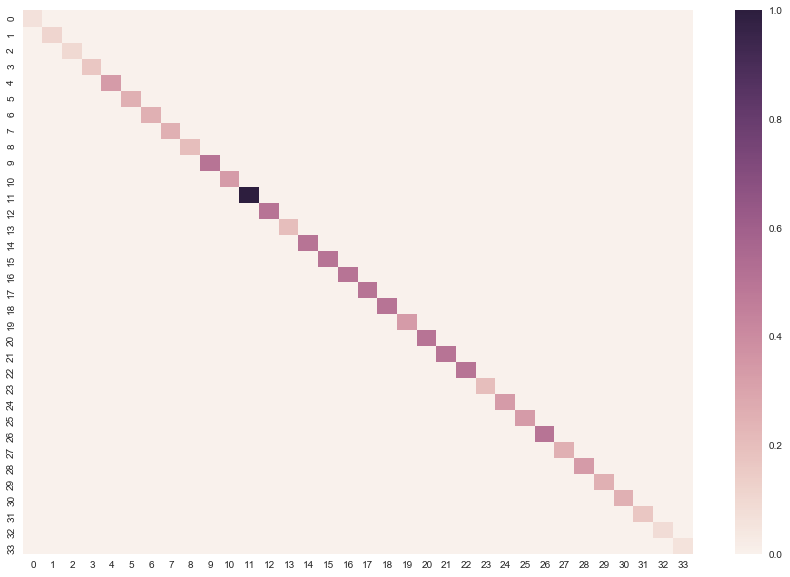

In [4]:
#Inverse of D
inv_D = np.diag(1./np.sum(matrix,axis=1))
inv_D
plt.figure(figsize=(15,10))
sns.heatmap(inv_D)

[[ 0.          0.0625      0.0625     ...,  0.0625      0.          0.        ]
 [ 0.11111111  0.          0.11111111 ...,  0.          0.          0.        ]
 [ 0.1         0.1         0.         ...,  0.          0.1         0.        ]
 ..., 
 [ 0.16666667  0.          0.         ...,  0.          0.16666667
   0.16666667]
 [ 0.          0.          0.08333333 ...,  0.08333333  0.          0.08333333]
 [ 0.          0.          0.         ...,  0.05882353  0.05882353  0.        ]]


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

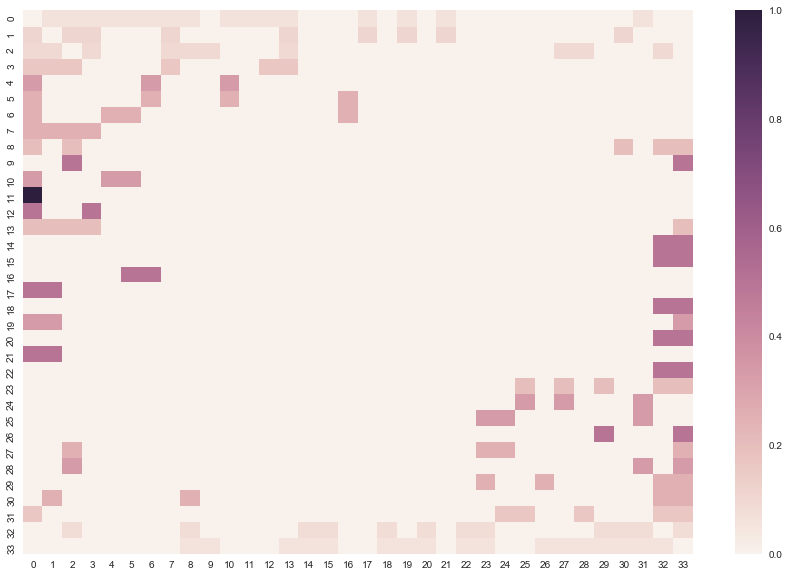

In [5]:
#P-1 * A
markov = np.dot(inv_D,matrix.T.astype(int))
print markov
plt.figure(figsize=(15,10))
sns.heatmap(markov)
np.sum(markov,axis=1)

### 2. Stationnary Distribution


In [6]:
from scipy.linalg import eig

S, U = eig(markov, right=False, left=True)
# print S
# print U

In [7]:
# Eigenvector corresponding to the eigenvalue 1
print np.abs(S - 1.)
np.argsort(np.abs(S - 1.))
# Position 0!

[  2.22044605e-15   1.32272329e-01   2.87048985e-01   3.87313233e-01
   1.71461135e+00   6.12230540e-01   6.48992947e-01   7.07208202e-01
   7.39957989e-01   7.70910617e-01   8.22942852e-01   8.64832945e-01
   9.06816002e-01   1.10538084e+00   1.15929996e+00   1.26802355e+00
   1.61190959e+00   1.56950660e+00   1.35177826e+00   1.49703011e+00
   1.39310454e+00   1.41691585e+00   1.44857938e+00   1.58333333e+00
   1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00]


array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 25, 26, 30, 29, 28,
       27, 31, 33, 32, 24, 13, 14, 15, 18, 20, 21, 22, 19, 17, 23, 16,  4])

[-0.45958799+0.j -0.25851825+0.j -0.28724249+0.j -0.17234550+0.j
 -0.08617275+0.j -0.11489700+0.j -0.11489700+0.j -0.11489700+0.j
 -0.14362125+0.j -0.05744850+0.j -0.08617275+0.j -0.02872425+0.j
 -0.05744850+0.j -0.14362125+0.j -0.05744850+0.j -0.05744850+0.j
 -0.05744850+0.j -0.05744850+0.j -0.05744850+0.j -0.08617275+0.j
 -0.05744850+0.j -0.05744850+0.j -0.05744850+0.j -0.14362125+0.j
 -0.08617275+0.j -0.08617275+0.j -0.05744850+0.j -0.11489700+0.j
 -0.08617275+0.j -0.11489700+0.j -0.11489700+0.j -0.17234550+0.j
 -0.34469099+0.j -0.48831224+0.j]
[[16  0  0 ...,  0  0  0]
 [ 0  9  0 ...,  0  0  0]
 [ 0  0 10 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  6  0  0]
 [ 0  0  0 ...,  0 12  0]
 [ 0  0  0 ...,  0  0 17]]


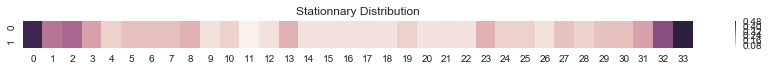

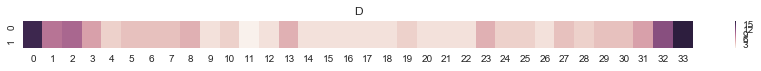

In [8]:
stationary = np.array(U.T[0])
# stationary /= np.sum(stationary)
print stationary
print D

plt.figure(figsize=(15,0.5))
sns.heatmap([np.abs(stationary),np.abs(stationary)]).set_title('Stationnary Distribution')

plt.figure(figsize=(15,0.5))
sns.heatmap([np.sum(matrix,axis=0),np.sum(matrix,axis=1)]).set_title('D')

$\pi(i) \sim d_i$ !!

Finally worked this out!

### 3. Cut using probability of reaching V1 before V0

Here I'm using a different method than the presented in the PDF.  
I'm using the Q Matrix,matrix transition probabilities from {2,..32,33} to itself, 

(32, 32) (34, 34)


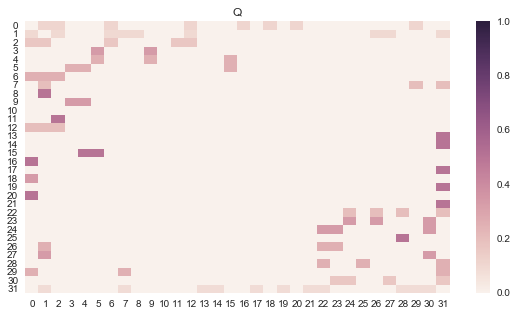

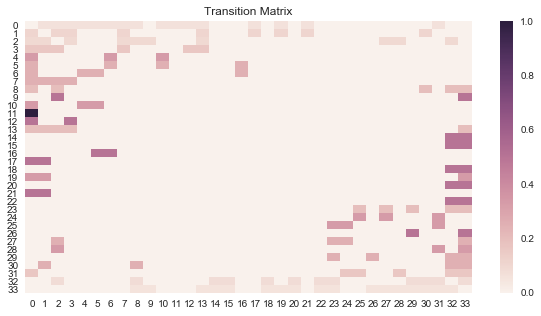

In [9]:
Q = markov[1:33,1:33]
print Q.shape, markov.shape
Q
plt.figure(figsize=(9.5,5))
sns.heatmap(Q,vmax=1).set_title('Q')
plt.figure(figsize=(10,5))
sns.heatmap(markov).set_title('Transition Matrix')

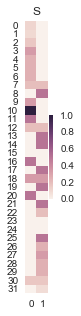

In [10]:
S1 = markov.T[0][1:33] 
S2 = markov.T[33][1:33]
S = np.column_stack((S1,S2))
plt.figure(figsize=(0.5,5))
sns.heatmap(S,vmax=1).set_title('S')

In [11]:
n = len(markov)
prob = np.dot(np.linalg.inv(np.identity(n-2)-Q),S)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


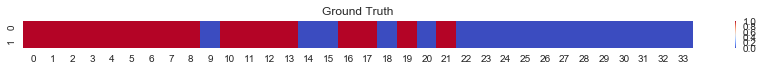

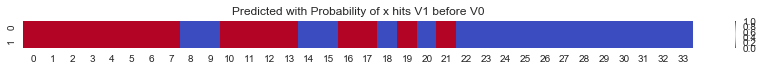

In [12]:
ground_truth = [0 if x in data['blue_list'] else 1 for x in range(1,35)]
results = [0 if x >= 0.5 else 1 for x in prob.T[1]]
results = [1] + results + [0]

print ground_truth
plt.figure(figsize=(15,0.5))
sns.heatmap([ground_truth,ground_truth],cmap='coolwarm').set_title('Ground Truth')

plt.figure(figsize=(15,0.5))
sns.heatmap([results,results],cmap='coolwarm').set_title('Predicted with Probability of x hits V1 before V0')

In [13]:
# Cut in the graph

def value(node):
    if node == 1:
        return 0
    if node == 34:
        return 1
    return prob.T[1][node-2]
    
for link in data['graph']['links']:
    if (value(link['source'])>=0.5 and value(link['target'])<0.5) or (value(link['source'])<0.5 and value(link['target'])>=0.5):
        link['value'] = 20
        link['cut'] = True
    else:
        link['value'] = 1
        link['cut'] = False

In [14]:
import json
with open('cluster_karate_B.json', 'w') as outfile:
    json.dump(data['graph'], outfile)

![alt src](project2_images/cut.png)

### Effective Flux

In [15]:
def J(x,y):
    if x == y:
        return 0
    else:
        return stationary[x-1]*(1-value(x))*markov[x-1][y-1]*value(y)
    
def J_p(x,y):
    return max([0,J(x,y)-J(y,x)])

In [16]:
SET = range(1,35)

In [17]:
def T(x):
    if x == 1:
        return sum([J_p(x,y) for y in SET])
    if x == 34:
        return sum([J_p(y,x) for y in SET])
    return sum([J_p(x,y) for y in SET])

In [18]:
[abs(T(x)) for x in SET]

[0,
 0.021355138876753315,
 0.033768343498416946,
 0.011823648310890535,
 0,
 0,
 0,
 0.0078114486600315948,
 0.020132806769944236,
 0.0072938251053011414,
 0,
 0,
 0.0039270193941844233,
 0.018872831103061379,
 0.0027484691089952194,
 0.0027484691089952116,
 0,
 0.004627578290644219,
 0.0027484691089952103,
 0.016064447460284792,
 0.0027484691089952112,
 0.0046275782906442181,
 0.0027484691089952095,
 0.0061064763894705075,
 0.0017028834151069025,
 0.0028311908661833472,
 0.0014250294021209439,
 0.0089914974011619381,
 0.0080547152714290082,
 0.004275088206362819,
 0.012780850571328609,
 0.019147753877386674,
 0.022904833797849397,
 0]

In [19]:
for link in data['graph']['links']:
    s = link['source']
    t = link['target']
    link['value'] = abs(J_p(s,t))
    if(J_p(s,t)>=0):
        link['target'] = s
        link['source'] = t
        
for node in data['graph']['nodes']:
    node['radius'] = abs(T(node['id']))
    

In [20]:
import json
with open('cluster_karate_C.json', 'w') as outfile:
    json.dump(data['graph'], outfile)

![alt src](project2_images/final.png)

In [21]:
abs(J_p(32,1))

0.019147753877386674

In [22]:
# Matlab Code

% Transition Path Analysis for Karate Club network
%
%   Reference:
%       Weinan E, Jianfeng Lu, and Yuan Yao (2013) 
%       The Landscape of Complex Networks: Critical Nodes and A Hierarchical Decomposition. 
%       Methods and Applications of Analysis, special issue in honor of Professor Stanley Osher on his 70th birthday, 20(4):383-404, 2013.

% load the Adjacency matrix of Karate Club network
%   replace it by your own data
load karate_rand1.mat A

D = sum(A, 2);
N = length(D);
Label = [0:N-1];
TransProb = diag(1./D) * A;
LMat = TransProb - diag(ones(N, 1));

% source set A contains the coach
% target set B contains the president 
SetA = 1; % [44:54];%[find(ind==19)];%[44:54];%18 + 1;
SetB = 34; %[find(ind==11)];%10 + 1; % seems to be 11 instead of 10

[EigV, EigD] = eig(LMat');
EquiMeasure = EigV(:, 1)./sign(EigV(1,1));

for i = 1:N
  localmin = true;
  for j = setdiff(1:N, i)
    if ((LMat(i,j)>0)&(EquiMeasure(j)>EquiMeasure(i))) 
      localmin = false;
      break
    end
  end
  if (localmin)
    i
  end
end

mfpt = zeros(N, 1);
SourceSet = 11;
RemainSet = setdiff(1:N, SourceSet);
mfpt(RemainSet) = - LMat(RemainSet, RemainSet) \ ones(N-1, 1);

TransLMat = diag(EquiMeasure) * LMat * diag(1./EquiMeasure); 

SourceSet = SetA;
TargetSet = SetB;
RemainSet = setdiff(1:N, union(SourceSet, TargetSet));

% Initialization of Committor function: transition probability of reaching
% the target set before returning to the source set.
CommitAB = zeros(N, 1);
CommitAB(SourceSet) = zeros(size(SourceSet));
CommitAB(TargetSet) = ones(size(TargetSet));

LMatRestrict = LMat(RemainSet, RemainSet);
RightHandSide = - LMat(RemainSet, TargetSet) * CommitAB(TargetSet);

% Solve the Dirchelet Boundary problem
CommitAB(RemainSet) = LMatRestrict \ RightHandSide;

% Clustering into two basins according to the transition probability 
ClusterA = find(CommitAB <= 0.5);
ClusterB = find(CommitAB > 0.5);

% The inverse transition probability (committor function)
CommitBA = zeros(N, 1);
CommitBA(SourceSet) = ones(size(SourceSet));
CommitBA(TargetSet) = zeros(size(TargetSet));

LMatRestrict = LMat(RemainSet, RemainSet);
RightHandSide = - LMat(RemainSet, SourceSet) * CommitBA(SourceSet);

% Dirichelet Boundary Problem with inverse transition probability
CommitBA(RemainSet) = LMatRestrict \ RightHandSide;

RhoAB = EquiMeasure .* CommitAB .* CommitBA;

% Current or Flux on edges
CurrentAB = diag(EquiMeasure .* CommitBA) * LMat * diag(CommitAB);
CurrentAB = CurrentAB - diag(diag(CurrentAB));

% Effective Current Flux
EffCurrentAB = max(CurrentAB - CurrentAB', 0);

% Transition Current or Flux on each node
TransCurrent = zeros(N, 1);
TransCurrent(ClusterA) = sum(EffCurrentAB(ClusterA, ClusterB), 2);
TransCurrent(ClusterB) = sum(EffCurrentAB(ClusterA, ClusterB), 1);

SyntaxError: invalid syntax (<ipython-input-22-2475db40d6f6>, line 12)